# Matrius amb numpy

Una matriu és un array, que "té forma" de matriu.

In [3]:
import numpy as np

a = np.array(range(10), float)
print(a)
a = a.reshape((5, 2))
print(a)

print(a[3][1])

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[[0. 1.]
 [2. 3.]
 [4. 5.]
 [6. 7.]
 [8. 9.]]
7.0


També podem fer servir np.zeros(). Les dimensions es posen entre parèntesis. Hi haurà DOS parèntesis np.zeros((...))

In [ ]:
aa=np.zeros((5,4))
print(aa)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Una matriu es pot definir a partir dels seus valors. Cada fila és un array, i la matriu és un array d'arrays.

In [ ]:
m=np.array([[1,2,3,4],[5,6,7,8],[9,0,1,2]])
print(m)
print(m[2][1])

[[1 2 3 4]
 [5 6 7 8]
 [9 0 1 2]]
0


Podem treballar amb només una part d'una matriu.

In [9]:
m=np.array([[1,2,3,4,5,6,7,8],[2,3,4,5,6,7,8,9],[3,4,5,6,7,8,9,0],[4,5,6,7,8,9,0,1],[5,6,7,8,9,0,1,2]])
print(m)
print("*"*20)
print(m[2:4,1:5])

[[1 2 3 4 5 6 7 8]
 [2 3 4 5 6 7 8 9]
 [3 4 5 6 7 8 9 0]
 [4 5 6 7 8 9 0 1]
 [5 6 7 8 9 0 1 2]]
********************
[[4 5 6 7]
 [5 6 7 8]]


Podem multiplicar una matriu m x n per un vector de m coordenades i el resultat és un vector de n coordenades.

In [ ]:
b=np.array([1,2,3,4])
x=m.dot(b)
print(x)

També podem invertir una matriu, si és invertible.

In [ ]:
A=np.array([[1,2,3,4],[3,-1,6,0],[1,1,-2,-2],[0,0,-1,-2]])
B= np.linalg.inv(A)
print("A : ")
print(A)
print("B : ")
print(B)

Per tant, podem resoldre un sistema lineal compatible determinat.

In [ ]:
b=np.array([1,1,1,1])
x=np.linalg.inv(A).dot(b)
print(x)

En les matrius, el primer índex indica la fila, i el segon la columna.

Nosaltres hem utilitzat el primer índex per a la x i el segon per a la y (o la t). Per tant, les matrius estaran transposades, respecte a l'ordre habitual dels eixos. Ho haurem de tenir en compte quan volguem fer una gràfica de la funció.

# Gràfiques de funcions en 3D

Per fer una gràfica en 3D, hem de discretitzar dos intervals i demanar a numpy que els interpreti com una malla en el pla.

Després, a cada punt podem calcular la funció.
El resultat (en el codi, Z) és una matriu que guarda els valors de la funció a cada punt.

Per fer el dibuix, hem de:
*   crear una figura
*   afegir els eixos (en el codi, ax)
*   dibuixar la funció (hi ha diversos modes, nosaltres hem triat el wireframe),
*   mostrar el dibuix (amb la instrucció show()).

Es pot dibuixar més d'una funció en els mateixos eixos.

[[-0.         -0.0788879  -0.15777581 ... -2.36663714 -2.44552505
  -2.52441295]
 [-0.         -0.07379969 -0.14759937 ... -2.21399057 -2.28779026
  -2.36158994]
 [-0.         -0.06806331 -0.13612662 ... -2.04189934 -2.10996265
  -2.17802597]
 ...
 [ 0.          0.09102484  0.18204967 ...  2.73074512  2.82176996
   2.91279479]
 [ 0.          0.08852447  0.17704895 ...  2.65573423  2.7442587
   2.83278318]
 [ 0.          0.08524663  0.17049327 ...  2.55739901  2.64264565
   2.72789228]]


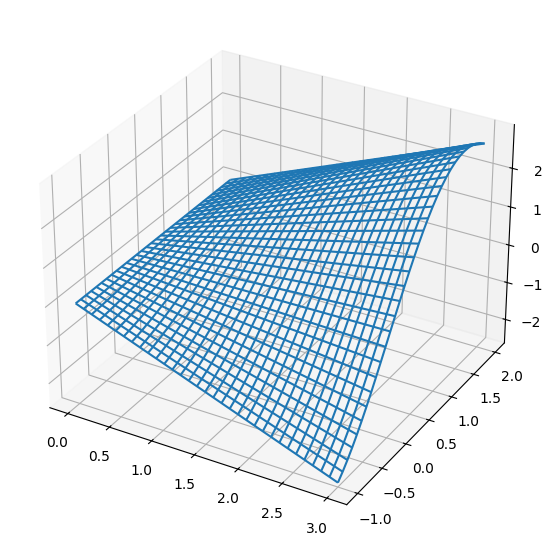

In [ ]:
import matplotlib.pyplot as plt

x=np.linspace(0,3,33)
y=np.linspace(-1,2,33)

fig = plt.figure(figsize=(15,10))
X, Y = np.meshgrid(x, y)
Z=X*np.sin(Y)
print(Z)
ax = fig.add_subplot(121, projection='3d')
ax.plot_wireframe(X,Y,Z)

plt.show()

Ara podem veure què passa si guardem els valors de la funció en una matriu (tal com faríem si aproximéssim la solució d'una EDP).

Fem el dibuix dels valors guardats a A de la mateixa funció que hem calculat abans.

Les dues funcions haurien de ser la mateixa, però una és la "transposada de l'altra. Això és així perquè, en una matriu, l'element A[i][j] és l'element de a fila i, columna j, i per a nosaltres, és f(x_i,y_j). Per tant, el dibuix correcte és el de Z, i per dibuixar bé la funció utilitzant la matriu A, hauríem de transposar-la.

In [ ]:
A=np.zeros((33,33))
for i in range(33):
  for j in range(33):
    A[i][j]=x[i]*np.sin(y[j])

fig = plt.figure(figsize=(15,10))
X, Y = np.meshgrid(x, y)
Z=X*np.sin(Y)
ax = fig.add_subplot(121, projection='3d')
ax.plot_wireframe(X,Y,Z, color='green',alpha=0.5)
ax.plot_wireframe(X,Y,A, color='red',alpha=0.5)

plt.show()


In [ ]:
B=A.transpose()
fig = plt.figure(figsize=(15,10))
X, Y = np.meshgrid(x, y)
Z=X*np.sin(Y)
ax = fig.add_subplot(121, projection='3d')
ax.plot_wireframe(X,Y,Z, color='green',alpha=0.5)
ax.plot_wireframe(X,Y,B, color='red',alpha=0.5)

plt.show()

# <font color='red'> Observació</font>

Si volem fer càlculs i no ens cal dibuixar, podem treballar amb la matriu transposada!